# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
file_url = "https://drive.google.com/uc?id=1OUWZ2CgD9NZGlqXJEgfWBM38xC4DxJ05"
data = pd.read_csv(file_url, sep='\t')

# PERFORMING EDA ON THE DATASET

In [3]:
columns = []
for i in data.columns:
  columns.append(i)
columns

['rating', 'date', 'variation', 'verified_reviews', 'feedback']

In [4]:
for i in columns:
    print(f"Number of unique values in {i} is = {data[i].nunique()}")


Number of unique values in rating is = 5
Number of unique values in date is = 77
Number of unique values in variation is = 16
Number of unique values in verified_reviews is = 2300
Number of unique values in feedback is = 2


In [5]:
data.isnull().sum()

,0
rating,0
date,0
variation,0
verified_reviews,1
feedback,0


In [6]:
data.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [8]:
data.shape

(3150, 5)

In [9]:
data.drop(labels="date",axis = 1,inplace=True)

In [10]:
data.head()

,rating,variation,verified_reviews,feedback
0,5,Charcoal Fabric,Love my Echo!,1
1,5,Charcoal Fabric,Loved it!,1
2,4,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,Charcoal Fabric,Music,1


In [11]:
from sklearn.preprocessing import LabelEncoder
data['variation'] = LabelEncoder().fit_transform(data['variation'])

In [12]:
data.head()

,rating,variation,verified_reviews,feedback
0,5,5,Love my Echo!,1
1,5,5,Loved it!,1
2,4,10,"Sometimes while playing a game, you can answer...",1
3,5,5,I have had a lot of fun with this thing. My 4 ...,1
4,5,5,Music,1


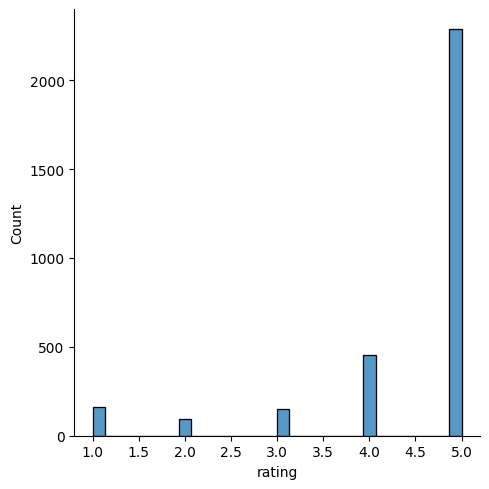

In [13]:
sns.displot(data,x='rating',legend=True)

<Axes: xlabel='rating', ylabel='count'>

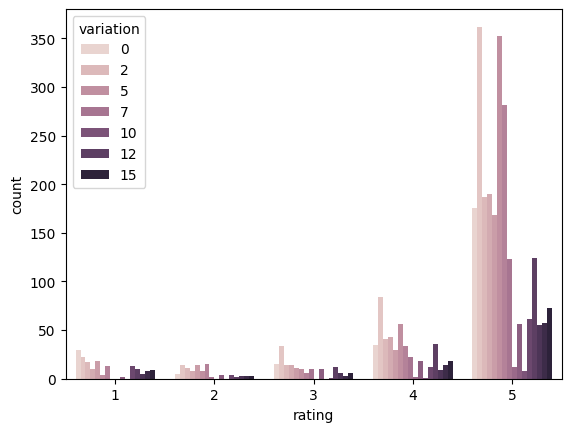

In [14]:
sns.countplot(x='rating',hue='variation',data=data)

<Axes: xlabel='variation', ylabel='count'>

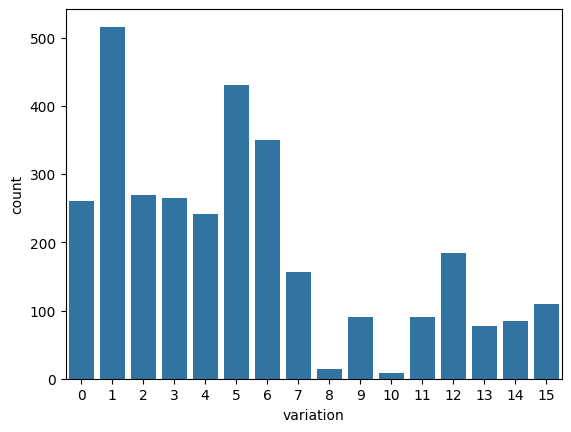

In [15]:
sns.countplot(x='variation',data=data)

<Axes: xlabel='rating', ylabel='count'>

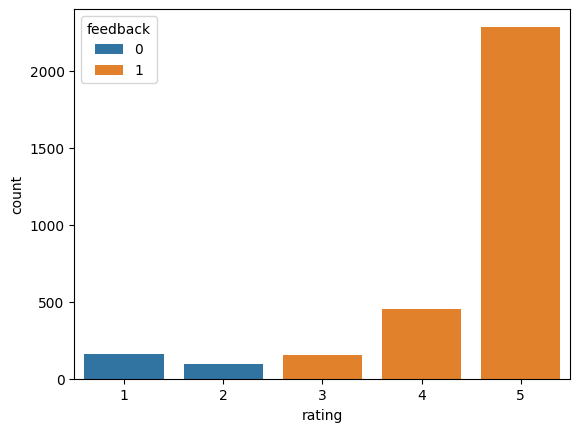

In [16]:
sns.countplot(x='rating',hue='feedback',data=data)

<Axes: xlabel='variation', ylabel='count'>

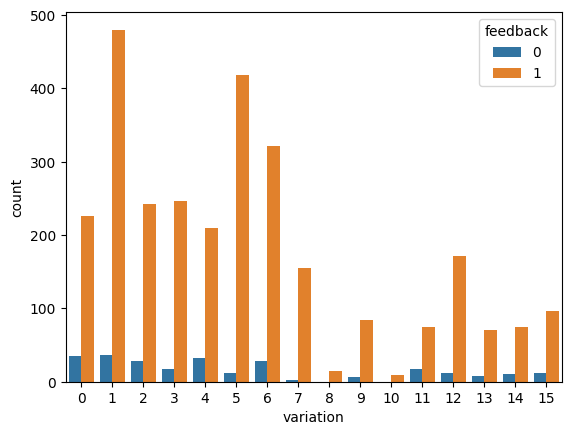

In [17]:
sns.countplot(x='variation',hue='feedback',data=data)

In [18]:
data.drop(labels=['variation','rating'],axis =1 ,inplace = True)

In [19]:
total_value = len(data['feedback'])
positive_comment = []
negative_comment = []

In [20]:
for i in data['feedback']:
  if i == 1:
    positive_comment.append(data['feedback'])
  else:
    negative_comment.append(data['feedback'])

In [21]:
print(len(positive_comment),len(negative_comment))
percent_of_positive_comment = (len(positive_comment)/total_value)*100
percent_of_negative_comment = (len(negative_comment)/total_value)*100

2893 257


In [22]:
print("percentage of positive comment = ",percent_of_positive_comment,"%")
print("percentage of negative comment = ",percent_of_negative_comment,"%")

percentage of positive comment =  91.84126984126985 %
percentage of negative comment =  8.158730158730158 %


<Axes: xlabel='feedback', ylabel='count'>

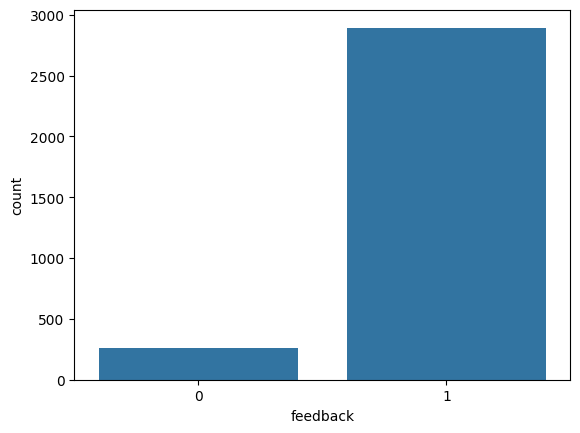

In [23]:
sns.countplot(x='feedback',data=data)

# PREDICTING THE FEEDBACK TO OWN COMMENT

In [24]:
data.head()

,verified_reviews,feedback
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1
4,Music,1


In [25]:
x = data['verified_reviews'].astype(str)
y = data['feedback']

In [26]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [27]:
tokenizer = Tokenizer(15212,lower=True,oov_token='UNK')
tokenizer.fit_on_texts(x)

In [28]:
x_seq = tokenizer.texts_to_sequences(x)




In [29]:

x_pad = pad_sequences(x_seq, maxlen=80, padding='post')
x_pad[0]

array([11,  8, 12,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=int32)

In [30]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_pad, y, test_size=0.2, random_state=42)

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
randomforest_classifier = RandomForestClassifier(n_estimators = 25, criterion = 'entropy', class_weight={0:6, 1: 1})
randomforest_classifier.fit(x_train, y_train)
Y_train_predict = randomforest_classifier.predict(x_train)
Y_predict = randomforest_classifier.predict(x_test)

In [33]:
from sklearn import metrics
print(metrics.accuracy_score(y_test,Y_predict))

0.9238095238095239


# Plotting the output

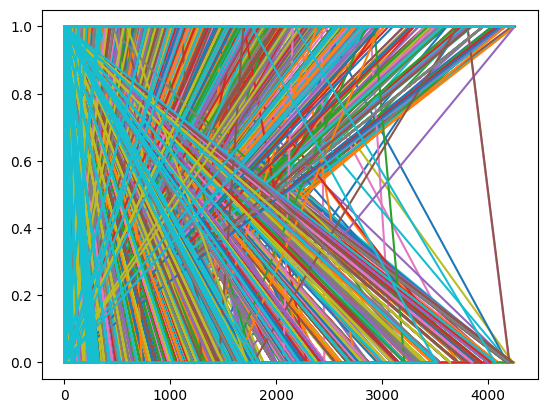

In [34]:
plt.plot(x_train,randomforest_classifier.predict(x_train))
plt.show()

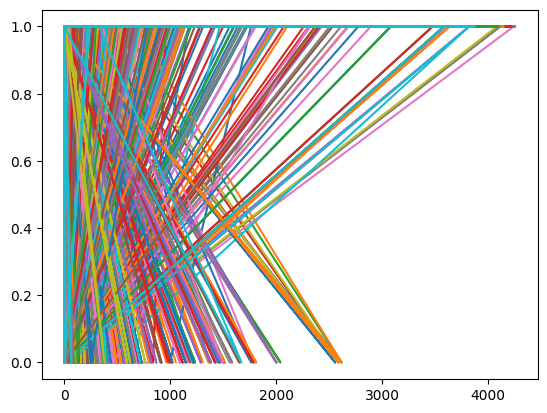

In [35]:
plt.plot(x_test,randomforest_classifier.predict(x_test))
plt.show()

In [45]:
def review_bot(feedback):
  sentence_lst=[]
  sentence_lst.append(feedback)
  sentence_seq=tokenizer.texts_to_sequences(sentence_lst)
  sentence_padded=pad_sequences(sentence_seq,maxlen=80,padding='post')
  ans=randomforest_classifier.predict(sentence_padded)
  print(ans.all())
  if ans.all() == 1:
    print("positive feedback")
  else:
    print("negative feedback")
review_bot(str(input("Enter a review : ")))

Enter a review : curse
False
negative feedback
